In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Step 1

1a) Sampling

In [2]:
audio='longSER1.wav'
y, sr = librosa.load(audio, sr=16000)
print("Sample rate:", sr)
print("Audio shape:",y.shape)
print("Duration(s):",len(y)/sr)

Sample rate: 16000
Audio shape: (898176,)
Duration(s): 56.136


In [3]:
import IPython.display as ipd
ipd.Audio(y,rate=sr)

1b) Plotting

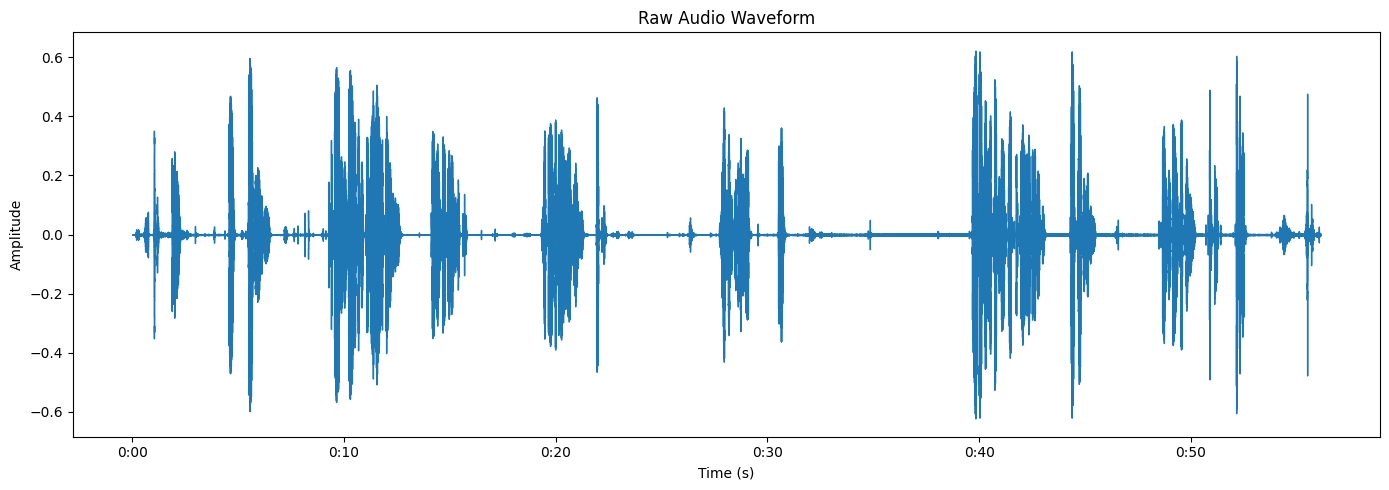

In [4]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)
plt.title('Raw Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

### Step 2

2a) Normalisation

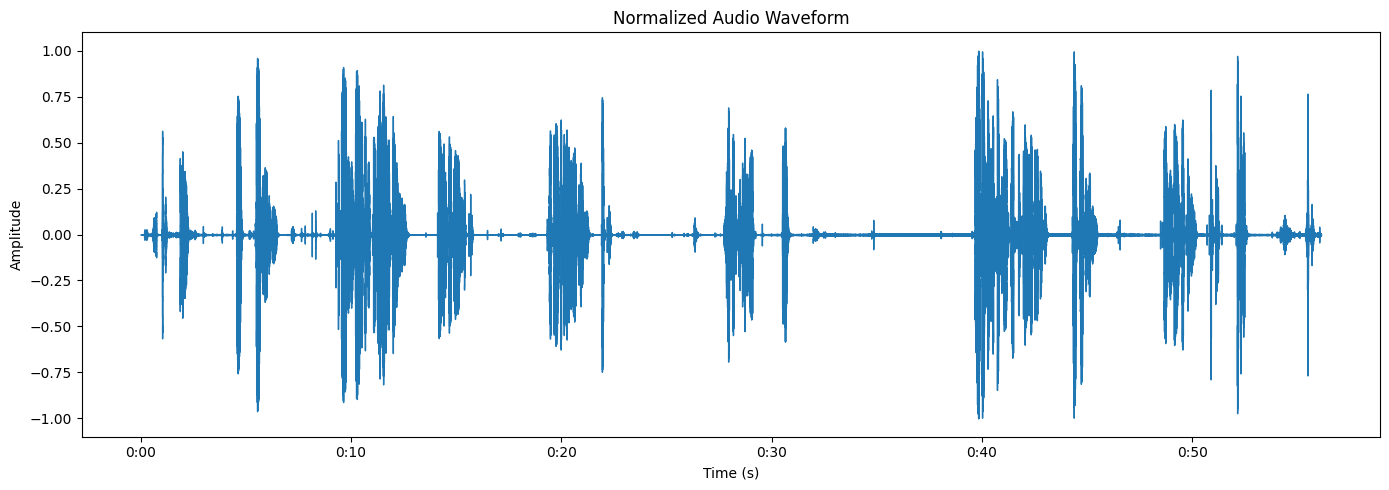

In [5]:
# y_norm = y / np.max(np.abs(y))
y_norm = librosa.util.normalize(y)

plt.figure(figsize=(14,5))
librosa.display.waveshow(y_norm,sr=sr)
plt.title('Normalized Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

2b) Pre-emphasis

In [6]:
pre_emphasis=0.97
y_pre=np.append(y_norm[0],y_norm[1:]-pre_emphasis*y_norm[:-1])


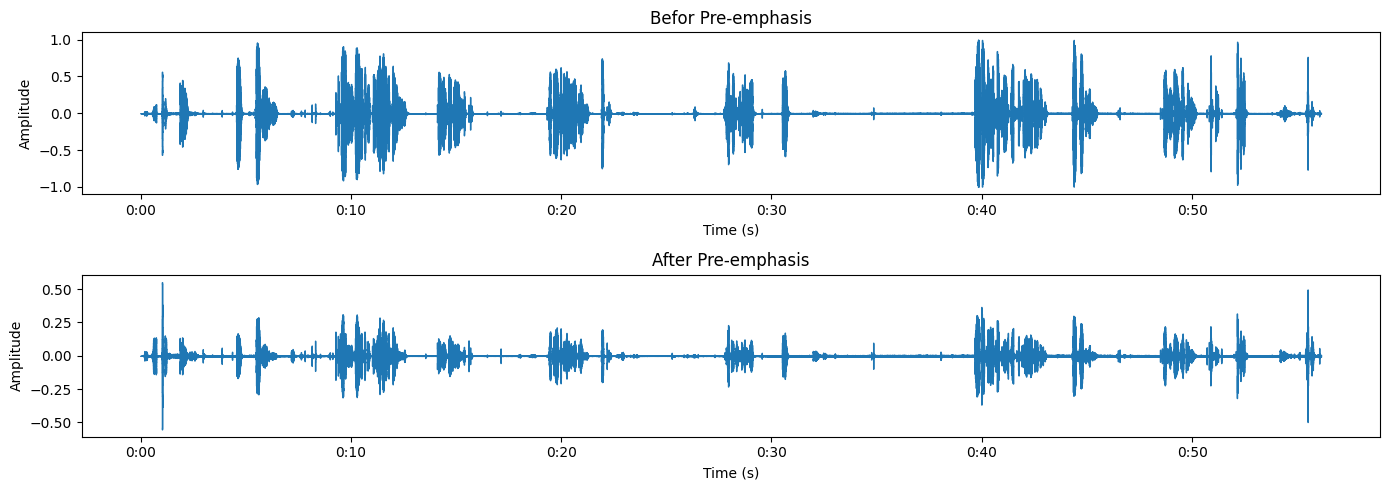

In [7]:
plt.figure(figsize=(14, 5))
plt.subplot(2,1,1)
librosa.display.waveshow(y_norm,sr=sr)
plt.title('Befor Pre-emphasis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude') 
 
plt.subplot(2,1,2)
librosa.display.waveshow(y_pre,sr=sr)
plt.title('After Pre-emphasis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude') 
plt.tight_layout()
plt.show()

### Step 3

3a) Segmentation (3s)

In [8]:
segment_time=3
segment_samples=int(segment_time*sr)
segmented_y=[]

for start in range(0,len(y_pre),segment_samples):
    end=start+segment_samples
    segment=y_pre[start:end]
    if len(segment)==segment_samples:
        segmented_y.append(segment)

segmented_y=np.array(segmented_y)
print("Segmented audio shape:",segmented_y.shape)


Segmented audio shape: (18, 48000)


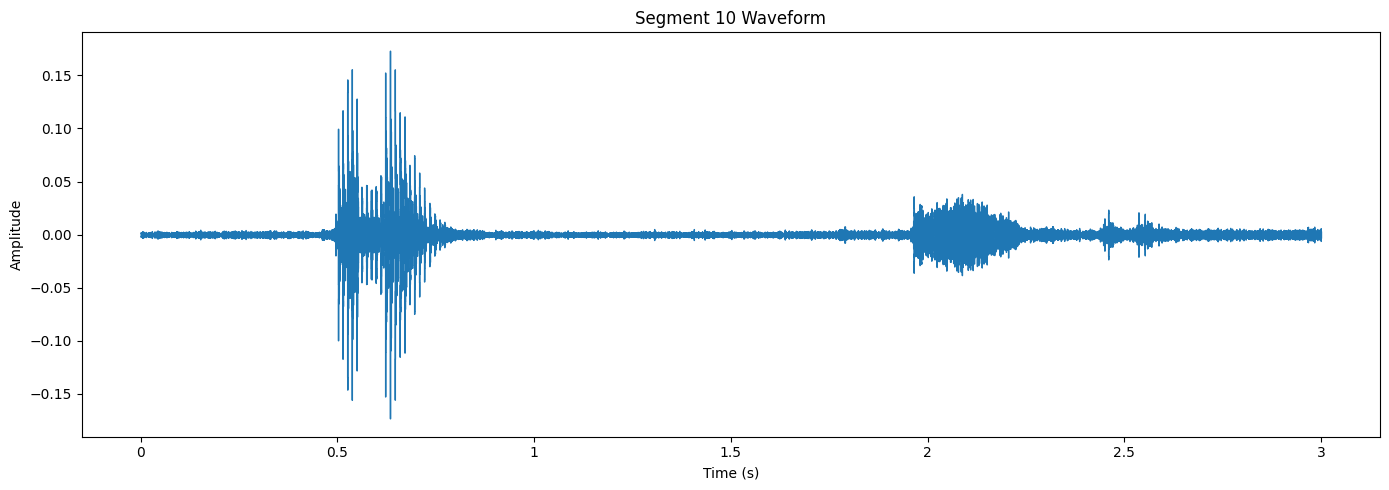

In [9]:
check_seg=10

plt.figure(figsize=(14,5))
librosa.display.waveshow(segmented_y[check_seg],sr=sr)
plt.title(f'Segment {check_seg} Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

3b) Framing (Windowing + Hoping)

example....

In [10]:
frame_length=int(0.025*sr)
hop_length=int(0.010*sr)
print("Frame length:",frame_length)
print("Hop length:",hop_length)

segment=segmented_y[0]

frames=librosa.util.frame(
    segment,
    frame_length=frame_length,
    hop_length=hop_length
)

print("Frames ka shape is:",frames.shape)

Frame length: 400
Hop length: 160
Frames ka shape is: (400, 298)


In [11]:
ham_window=np.hamming(frame_length) #create hamming curve of length 25ms
windowed_frames=frames*ham_window[:,np.newaxis] #multiply it with each frame

print("Windowed frames shape:",windowed_frames.shape)

Windowed frames shape: (400, 298)


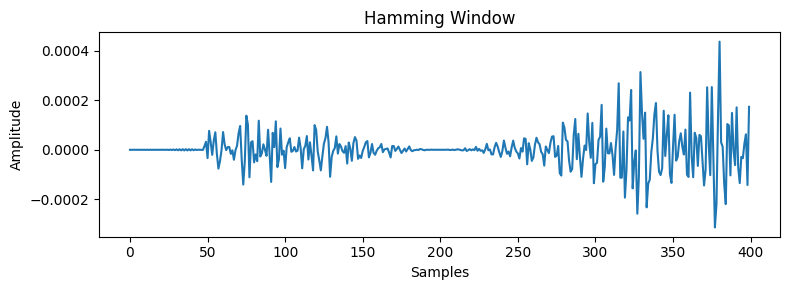

In [12]:
plt.figure(figsize=(8,3))
# plt.plot(frames[:,10],color='black')
# plt.plot(windowed_frames[:,10])
plt.plot(windowed_frames[:,10]-frames[:,10])
plt.title('Hamming Window')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

3c) Applying STFT

actual Windowing+Hoping+Hamming happens when STFT is applied

In [13]:
n_fft = 512

stft = librosa.stft(
    segmented_y[0],
    n_fft=n_fft,
    hop_length=hop_length,
    win_length=frame_length,
    window='hamming'
)

print(stft.shape)

(257, 301)


abs value of STFT

In [14]:
magnitude = np.abs(stft)
print("Magnitude shape:",magnitude.shape)

Magnitude shape: (257, 301)


displaying linear spectrogram

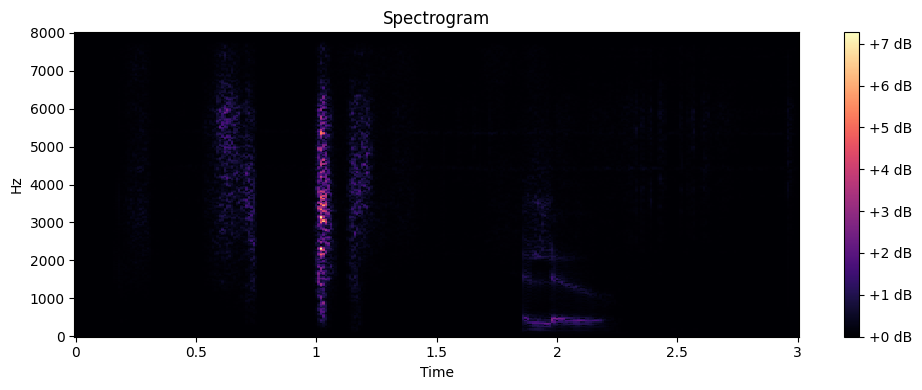

In [15]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    magnitude,
    sr=sr,
    hop_length=hop_length,
    x_axis='time',
    y_axis='linear'
)
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.tight_layout()
plt.show()

liner ---> Log spectrogram (log scaling)

In [16]:
log_magnitude = librosa.amplitude_to_db(magnitude, ref=np.max)
print("Log Magnitude shape:",log_magnitude.shape)

Log Magnitude shape: (257, 301)


display Log mag spectrogram

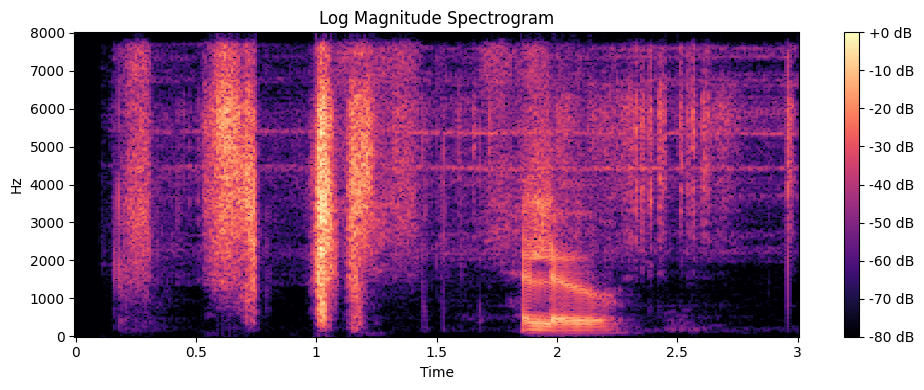

In [17]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    log_magnitude,
    sr=sr,
    hop_length=hop_length,
    x_axis='time',
    y_axis='linear'
)
plt.colorbar(format="%+2.0f dB")
plt.title("Log Magnitude Spectrogram")
plt.tight_layout()
plt.show()

example of how mel scaling is done

In [18]:
n_mels = 40 #standard for speech emotion

mel_spectrogram = librosa.feature.melspectrogram(
    y=segmented_y[8],
    sr=sr,
    n_fft=n_fft,
    hop_length=hop_length,
    win_length=frame_length,
    window='hamming',
    n_mels=n_mels,
    power=2.0
)

mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)


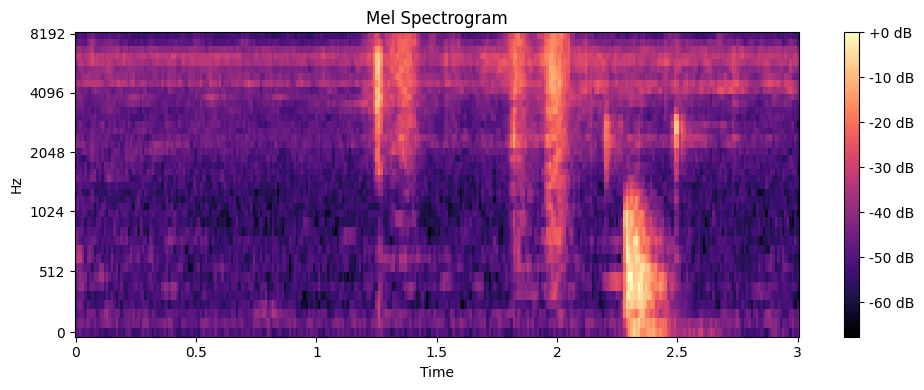

In [19]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    hop_length=hop_length,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()

Example of MFCC

In [20]:
mfcc = librosa.feature.mfcc(
    y=segmented_y[0],
    sr=sr,
    n_mfcc=13,
    n_fft=n_fft,
    hop_length=hop_length,
    win_length=frame_length,
    window='hamming',
    n_mels=40
)


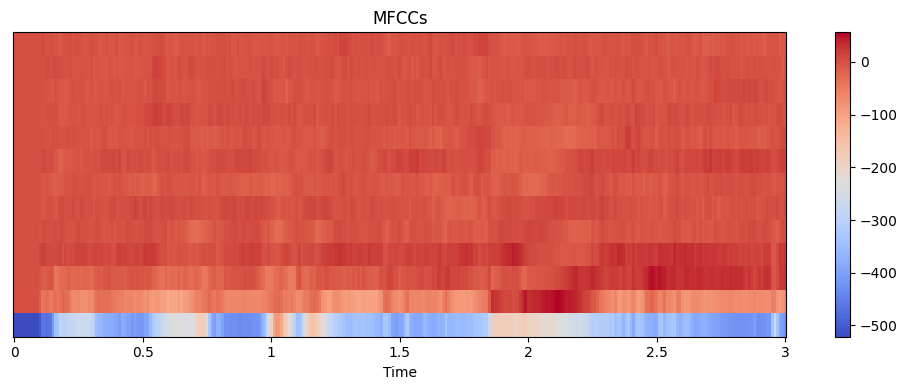

In [21]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mfcc,
    sr=sr,
    hop_length=hop_length,
    x_axis='time'
)
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()